# 52465 Programming for Data Analysis

# Project: Simulation of a data set relating to eyesight

## Preliminaries

All software required for this project is listed in the references below [1-10]. Here, we load the particular packages needed in the notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# https://stackoverflow.com/questions/16816013/is-it-possible-to-print-using-different-colors-in-ipythons-notebook
from termcolor import colored

print(colored('hello', 'red'), colored('world', 'green'))
print(colored("hello red world", 'red'))
print(colored("test", 'blue'))
print(colored("ing", 'magenta'))

hello world
hello red world
test
ing


Set my plot preferences.

In [3]:
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (6, 4) #10,6
# Set font size for axes labels etc.
plt.rcParams['font.size'] = (14)

## If I use Seaborn:
## To pick a color palette
# sns.choose_colorbrewer_palette(data_type="q")

## Set up my Seaborn plotting preferences.
# current_palette = sns.color_palette()
# sns.palplot(current_palette)
# sns.set_style('whitegrid')


***
# 1. Introduction

For this project, we have been asked to simulate a real-world phenomenon of our own choosing. Our task is to model and synthesize data relating to this phenomenon using Python, in particular the numpy.random package. The end product of this project should be a synthesized data set.   

In this notebook I will examine the phenomenon of eyesight, specifically short-sightedness (also referred to as myopia). I wish to create a data set of variables associated with myopia. I would like to simulate the distribution of short-sightedness (myopia) in a random sample of the population. I would also like to explore the relationships, if any, between factors which seem to contribute to myopia. The questions I want to explore include: 
- What is the distribution of myopia in a random sample of the population?
- What are the factors that contribute to myopia?
- How are these individual factors/causes distributed in the population?
- Are the causes related to each other in any way?
- If so, how?

At the outset, as I imagine what the final data set might look like, I want to picture what a Seaborn pairplot might look like for the synthesized data set. From initial research:
- I expect the amount of myopia to be hereditary, suggesting use of a categorical variable to represent the strength of that hereditary factor. The pairplot might reveal clustering of data points for each value of that categorical variable.
- I think that the amount of myopia may have some dependence on age. It usually starts sometime during childhood and progresses through adolescence. 
- I need to model the distribution of ages in the population.
- I need to find out how myopia is actually distributed in the general population.
- Myopia is possibly related to environmental factors such as the amount of time one spends doing close work, or alternatively, how much time one spends outdoors. I have a feeling that this may be related related to age.

***
# 2. Myopia

This part of the notebook contains a comprehensive explanation of what myopia is, how it is quantified and corrected, and my reasons for wanting to study this phenomenon. 

## 2.1 What is myopia?

Myopia [10] is also referred to as short-sightedness or near-sightedness [ref 10-13]. I will stick to using the term myopia as it saves a bit of typing. It happens mainly because the eyeball grows too long so that distant objects appear blurry while only very close objects are sharp. It happens because light entering the eye comes to a focus in front of (rather than on) the back of the eye - the retina. This means that the clearest image of the object is formed in front of the retina rather than on it, where our brain records images. It is a refractive error of the eye: as light travels through the eye it is bent (refracted) and absorbed by the different structures it passes through, primarily the cornea and the lens. The cornea is the front surface of the eye and the lens is a transparent element behind the iris that helps to bring light to a focus. If the end result is that the light from an object comes to a focus away from the retina, then that person has a refractive error. In myopia light from distant objects comes to a focus in front of the retina.

<!--Drag and drop image to embed it-->
<!--Not rendering in GitHub so maybe insert another way-->
<!--![myopia-and-normal.jpg](attachment:myopia-and-normal.jpg)-->

<!--![myopia](images/myopia-and-normal.jpg)-->
<p align="center"> 
    <img src=images/myopia-and-normal.jpg>
 </p>

There are other common refractive errors apart from myopia. These include hyperopia (light comes to a focus behind the retina) and astigmatism (light in different planes comes to a focus at different points). A person with normal vision is emmetropic or, an emmetrope. The different refractive errors are illustrated below.

<!--![refErrors](images/Refractive-states-web.jpg)-->
<p align="center"> 
    <img src=images/Refractive-states-web.jpg width="400" height="300">
 </p>

Myopia, hyperopia, and astigmatism are easily corrected by optometrists who prescribe glasses or contact lenses of the correct power [hse ref]. In recent decades, laser eye surgery has also become very popular as a way to permanently correct these refractive errors for suitable candidates. It does so by re-shaping the surface of the cornea, changing its shape, and therefore changing how light is refracted as it travels through the front of the eye. On the surface it seems like an attractive option, but it is permanent and not without its own risks.

## 2.2 How is it quantified and corrected?

Refraction is measured in units called Dioptres (D), which is the reciprocal of focal length f measured in metres:

$$D = 1/f(m)$$

For example, 1 D = 1/(f=1m), 2 D = 1/(f=0.5m), 3 D = 1/(f=0.33m) and so on. So a 5 D lens would focus light at 1/5 = 0.2 m. For a person with normal vision, the combined power of the lens and cornea is 60 D (meaning the human eye focal length is approximately 17 mm). The amount of myopia is quantified by the power of the lens required to correct it (move the best focus back onto the retina). Negative values are needed to correct myopia so a sort-sighted person might have a prescription of -2 D perhaps. Conversely, a person with hyperopia (far-sighted) will have a positive prescription.  The severity of myopia is quantified as follows:
- mild if the amount is less than 3 D
- moderate if in the range -3 to -6 D
- high if more than -6 D

The current threshold value for myopia is a refractive error of less than or equal to -0.50 D. So someone with a -0.25 D error is not technically short-sighted. Lenses used for myopia correction usually come in 0.25 D steps - the closest one to a patient's prescription is used. The image below shows how a negative (concave) lens is used to correct myopia.

<p align="center"> 
    <img src=images/myopia-verses-myopia-corrected.png>
 </p>

Text(6.2, 0.9, 'high')

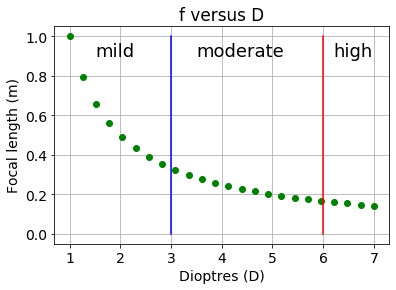

In [4]:
## Illustrate D vs f
d = np.linspace(1, 7, 24)
f = 1 / d

plt.plot(d, f, 'go')
plt.title("f versus D")
plt.xlabel("Dioptres (D)")
plt.ylabel("Focal length (m)")
plt.grid()
# Show limits
plt.plot([3, 3], [0, 1], 'b-')
plt.plot([6, 6], [0, 1], 'r-')
plt.text(1.5, 0.9, "mild", fontsize=18)
plt.text(3.5, 0.9, "moderate", fontsize=18)
plt.text(6.2, 0.9, "high", fontsize=18)

## 2.3 Why this question?

I'm interested in this question on a personal level because my teenage daughter has myopia. She started wearing glasses when she was nine years old, and every year her prescription went up a little, as expected. However, when she was 14 years old her eyesight deteriorated and her prescription almost doubled in just 10 months. By that stage she had the same prescription as her dad. Myopia progresses as you (and your eyeballs) grow, so if she continued on this track her optometrist speculated that she could end up at -5 or -6 D by the time she had finished growing. She is now wearing myopia correcting contact lenses for six days out of every seven, in an attempt to slow her myopia progression [ref]. These lenses have a central pupil which provides correction in the same way as ordinary contact lenses do. However, they also have a peripheral ring on the outside edge of the lens, where the correction is lower so that light from this part of the lens comes to a focus in front of the retina. Somehow, (I haven't been able to find the exact detail of how they work), this discourages growth of the eyeball and therefore slows myopia progression. They appear to be working - fingers crossed.

I'm also interested in this subject on a professional level because for many years I worked as a physicist building instruments to take very high-resolution images of the human eye. Light travelling from the retina out of the eye to form an image in a camera is affected by refractive errors in the same way as light coming into the eye. So errors like focus and astigmatism above, along with ones that have higher spatial frequencies, can degrade the quality of retinal images. I  measured higher order refractive errors in the eye and attempted to correct them using active optics. These are errors which cannot be compensated for using lenses, as they have complicated spatial patterns when measured over the pupil of the eye. The aim of that research was not to improve vision, rather to improve the quality of images of the retina.

There appears to be a very strong genetic component to myopia. Among my five siblings, only one started wearing glasses as a child, but my husband and all three of his siblings did. Typically, a child who has myopia will end up with more of it than their parent/s. So it progresses with each generation. Nowadays, one in four people has some degree of myopia and it appears to be becoming more prevalent [ref]. It is estimated that, if current trends continue, half of the world's population could have myopia by 2050. I'm interested in the reasons for this.

## 2.4 What are the risks associated with myopia?

It is inconvenient to wear glasses or contact lenses every day, especially for someone who does a lot of sports; I can't imagine not being able to see clearly when swimming, for example. Apart from this, there are also more serious consequences of having high myopia [ref]. In later life it is associated with an increased risk of retinal detachment, glaucoma, cataracts and other types of damage in the central retinal area. This higher risk comes from having a longer eyeball where the tissues are thinner and stretched; this thin tissue is more susceptible to tears, inflammation, weak blood vessels, and scarring. These pose serious threats to eyesight.

***
# 3. Factors associated with myopia

Some of the factors which contribute to, or are associated with, myopia are:
- **Genes**; one is much more likely to by myopic if one or both parents are. This could be modelled with a categorical variable of values 0, 1, 2 reflecting no, some, or a strong genetic predisposition. 
- The amount of **close work** done such as reading, use of screens, or mechanical work can influence the progression of myopia. This would be a continuous numerical variable representing time.
- There is some evidence to suggest that increasing the amount of **time spent outdoors** may have a protective effect against myopia. Another continuous numerical  variable representing time.
- It's unusual for young children to develop myopia. It's usually picked up towards the end of primary school. So, there must be some association with **age**, which is a positive integer.
- **Education** may play a role. Those with more education have spent more time doing close work, so it could be associated with level of education. The level might be a categorical variable of value primary, secondary, third, for example. [Ed ref]
- **Socio-economic status may also be a factor**. In a sweeping generalization, I would say that those of higher social class are more likely to progress to higher levels of education, therefore spending more time doing close work (less time outside), possibly increasing the progression of myopia, *if* the genetic predisposition is already there. Social class would be a categorical variable reflecting the, apparently, seven levels: elite, established middle class, technical middle class, new affluent workers, traditional working class, emergent service workers, and precariat [refs in SES]. 
- **Gender** is a possible option, not because one gender is more or less likely to be myopic, just because it is a common thing to record when taking a random sample of people. Commonly represented as a Male, Female categorical variable in data sets.
- The measure of myopia, **refractive error**, is the most important variable associated with myopia. This is a numerical variable. It is negative, with two decimal places, because this is how glasses prescriptions are quantified.

For this project I have decided to examine four variables in detail. In the next section I investigate each of them in turn. The variables I have chosen are: 
1. Genes,
2. Refractive error (or prescription),
3. Age,
4. The environmental factor of hours spent outside each day.

***
## 4. Investigation of variables associated with myopia

In [5]:
# number of samples/observations in the data set
n = 400

## 4.1 Genes

This variable will be called **genes**. It is a categorical variable which can take on one of three values depending on how many parents are myopic. Possible values are:
- none if neither parent is myopic
- some if one parent is
- strong if both parents are

In [6]:
# Classify genetic predisposition to myopia depending on how many parents are myopic
# 'none' if neither, 'some' if one, 'strong' if both
genetic_predisp = ['none', 'some', 'strong']

# In a random sample, what is the probability of finding each of these predispositions?
# UK: 25% have myopia, 4% high, so 75% don't. Reflect this roughly in the distribution.
genes = np.random.choice(genetic_predisp, n, p=[0.6, 0.30, 0.10])

# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
print("None: ", np.count_nonzero(genes == 'none'))
print("Some: ", np.count_nonzero(genes == 'some'))
print("Strong: ", np.count_nonzero(genes == 'strong'))

None:  253
Some:  111
Strong:  36


This genetic predisposition will have some influence on how much myopia each person has. At this stage of the analysis, I am not sure of scale factor from none to weak to strong [ref 24 -0.39D vs -0.74D]. [ref College of optometrists]. I will explore that further in the section on refraction.

## 4.2 Refractive error

This variable will be called **myopia**. It is a numerical variable, a negative real number with two decimal places. It has a maximum value of zero (no myopia) and it increases in the negative direction. It is the most important variable in my data set. I think a normal distribution would be a good place to start to investigate this variable as the normal distribution is very common in nature (as outlined in my numpy.random project for this module). I searched for histograms showing prevalence of myopia to find the best mean and standard deviations to use in a European population similar to Ireland [ref 25 Poland].

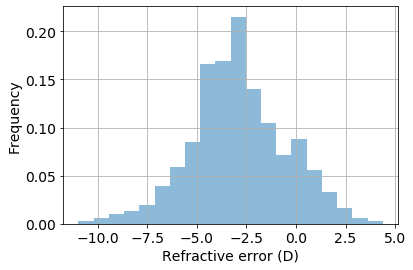

In [7]:
# Model refractive error with a normal distribution first.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5800189/
# Values for mean and standard deviation of myopes in Poland.
# mean, std
m, s = -3.1, 2.4
n1 = np.random.normal(m, s, n)

plt.hist(n1, bins=20, density=True, alpha=0.5)
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.grid()

However, by definition, myopia is a negative refractive error, so the distribution should not have any positive values. For that reason, a truncated normal distribution would be a good candidate to represent myopia in a population. 

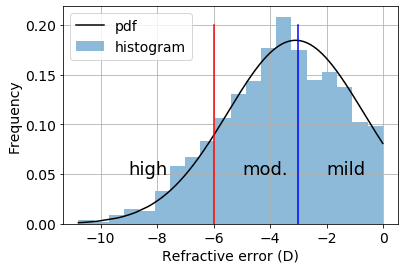

In [8]:
# Modified from:
# https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5800189/
# Values for mean and standard deviation of myopes in Poland.
# mean, std
mu, sigma = -3.1, 2.4
lower, upper = -12, 0

#instantiate an object X using the above four parameters,
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

#generate 1000 sample data points
samples = X.rvs(1000)

#compute the PDF of the sample data
pdf_probs = stats.truncnorm.pdf(samples, (lower-mu)/sigma, (upper-mu)/sigma, mu, sigma)

plt.hist(samples, bins= 20, density=True, alpha=0.5, label='histogram')
plt.plot(samples[samples.argsort()], pdf_probs[samples.argsort()], 'k', label='pdf')
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")

# Mark off mild, moderate, high myopia
plt.plot([-3, -3], [0.0, 0.20], 'b-')
plt.plot([-6, -6], [0.0, 0.20], 'r-')
plt.text(-2, 0.05, "mild", fontsize=18)
plt.text(-5, 0.05, "mod.", fontsize=18)
plt.text(-9, 0.05, "high", fontsize=18)

plt.legend()
plt.grid()

The vertical lines  show the limits of weak, moderate, and high myopia on this probability distribution function. Myopia is defined as a refractive error of $\leq$ 0.5 D and approximately 25% of people are myopic. The rest (75%) are not. So the histogram above must apply to people **with** myopia, not the general population. Perhaps those with a genetic predisposition could be sampled from here. The rest could be sampled from a uniform distribution with some noise added to throw some people into mild clinical myopia. In the UK 200,000 out of 5 million have high myopia, that's 4% [Moorfields ref 5%, 30% myopes). 
*So, perhaps we can tie this to genetic factor above?* Or, select 75% from uniform, 25% from truncated normal and apply genetics after as a boost. We will investigate the best approach now.

For those with no myopia, we could sample from a uniform distribution with some added noise. I think the noise is important because sometimes those with no myopic parents can develop myopia, it's just relatively unlikely and the amount is probably small.

Text(0, 0.5, 'D')

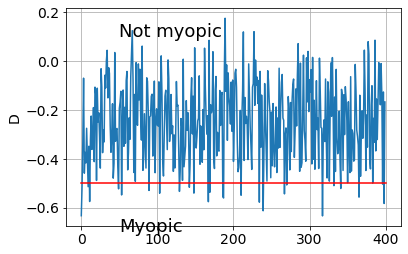

In [9]:
# Sample from a uniform distribution with some added noise.
base =  np.random.uniform(0, -0.5, n) + np.random.normal(0, 0.1, n)
# Beware positive values
x = np.arange(0, n)
plt.plot(x, base)
plt.plot([0, n], [-0.5, -0.5], 'r')
plt.text(50, -0.7, "Myopic", fontsize=18)
plt.text(50, 0.1, "Not myopic", fontsize=18)

plt.grid()
plt.ylabel('D')

I think I will link refractive error to genetics. Each value of genetic predisposition will result in a sample being taken from a different distribution, centred on different values of refraction.  

In [10]:
# What fraction of sample has each genetic predisposition?
fnone = np.count_nonzero(genes == 'none')/len(genes)
fsome = np.count_nonzero(genes == 'some')/len(genes)
fstrong = np.count_nonzero(genes == 'strong')/len(genes)

# Generate samples based on these fractions
print(n * fnone)
print(n * fsome)
print(n * fstrong)

# Want sum to always add to n for generating final dataframe. Doesn't always, so beware.
# Will be ok when genearting the final data set as each value in the genes column will be assigned a ref error.
print(n * (fnone + fsome + fstrong))

252.99999999999997
111.00000000000001
36.0
399.99999999999994


For now, I just want to generate three distributions of refraction, each associated with a genetic predisposition, and see if the final distribution looks sensible.

505
222
72
799


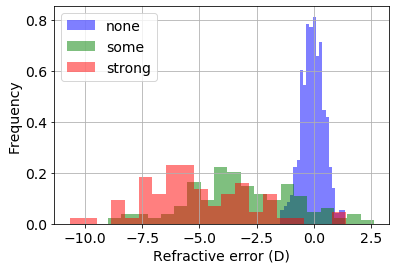

In [11]:
# Three distributions with different means and standard deviation. 
m0, s0 =  0, 0.5 # if Genes = none
m1, s1 = -3.2, 2.4 # if Genes = some
m2, s2 = -5, 2.4 # if Genes = strong

# Number of samples from each group reflects the number in that group.
# n from strong, more from some, more again from none
n0 = np.random.normal(m0, s0, int(2 *n * fnone))
# OR
# n0 = np.random.uniform(0, -0.5, int(2 *n * fnone)) + np.random.normal(0, 0.1, int(2 *n * fnone))
n1 = np.random.normal(m1, s1, int(2 * n * fsome))
n2 = np.random.normal(m2, s2, int(2 * n * fstrong))

print(len(n0))
print(len(n1))
print(len(n2))
print(len(n0) + len(n1) + len(n2))

plt.hist(n0, bins=20, density=True, alpha=0.5, FaceColor='b', label="none")
plt.hist(n1, bins=20, density=True, alpha=0.5, FaceColor='g', label="some")
plt.hist(n2, bins=20, density=True, alpha=0.5, FaceColor='r', label="strong")
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

This looks ok - looks even better if the number of samples is huge. If I combine these three, what does the resulting distribution look like?

400


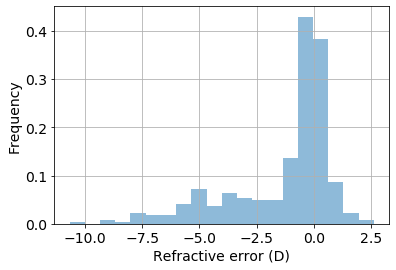

In [12]:
# Can see three populations, none, some, and strong
# Trying to replicate the truncated normal distribution above.

# Combine the three samples and pick n at random from the lot.
# Beware, I am losing the association with genes.
# However, I won't be doing it like this in the end, just for testing now.

r = np.concatenate((n0, n1, n2), axis=None)
err = np.random.choice(r, n, replace=False)

# Histograms
plt.hist(err, bins=20, density=True, alpha=0.5)
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.grid()
print(len(err))

The results seem to be sensible; most people are not myopic and there is a tail with decreasing probability towards high values of myopia. I would also need to ignore positive values. There are possibly too many large values of refraction in the sample (I may revisit this later on), but the trend is good. So, I think this is the approach I will take when generating a column of refractive error values based on the genes categorical variable.

## 4.3 Age
This variable will be called age. It is a numerical variable, a positive integer. It has a minimum value of zero and it increases in the positive direction. I need to find out what the typical distribution of ages is in a population, so that I can then relate environmental factors to age. It was not as easy as I thought it would be to find a distribution to replicate ages in a population. What comes up a lot is the age-sex population pyramid [wiki ref], a horizontal bar chart which shows the distribution of age groups in a population, usually broken down into males and females. Each country has its own characteristic population pyramid. The shape of the pyramid can show if the population is young (large base), older (large top), and what the dependence ratio is (how these numbers compare to the numbers working). I looked at the Central Statistics Office (CSO) website to find such information for Ireland from the 2016 census [CSO ref] as I would like to simulate this distribution of ages in the Irish population. The actual distribution of ages in 2016 looks like: 

<p align="center"> 
    <img src=images/census2016_popPyramid.JPG width="500" height="500">
 </p>

The CSO website has population data tables from the 2016 census. I'm not interested in any distinction between males and females for this project; I just want the total numbers. I'll read in the file and see what it looks like:

In [13]:
# Read in 2016 census data.
df = pd.read_csv('data\census2016.csv', header=None, nrows=18)

# Generate an 'age' label = to mid point of each age bin in the file.
df['years'] = np.arange(2, 89, 5)

# Generate a label for population
df['pop'] = df.iloc[:,1]

# Normalize data to max population
df['npop'] = df['pop']/df['pop'].max()
df

,0,1,years,pop,npop
0,0 - 4 years,331515,2,331515,0.851302
1,5 - 9 years,355561,7,355561,0.913050
2,10 - 14 years,319476,12,319476,0.820387
3,15 - 19 years,302816,17,302816,0.777606
4,20 - 24 years,273636,22,273636,0.702674
5,25 - 29 years,297435,27,297435,0.763788
6,30 - 34 years,361975,32,361975,0.929521
7,35 - 39 years,389421,37,389421,1.000000
8,40 - 44 years,357460,42,357460,0.917927
9,45 - 49 years,326110,47,326110,0.837423


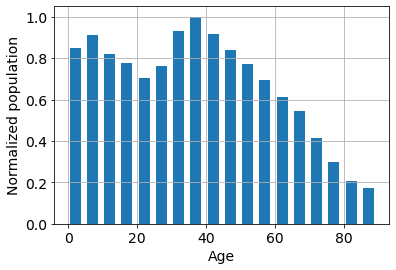

In [14]:
# What does this look like on a bar chart?
plt.bar(df['years'], df['npop'], width=3.2)
plt.xlabel('Age')
plt.ylabel('Normalized population')
plt.grid()

Ireland has a bulge at around seven years, and another at around 37 years. These reflect large populations of children and adults in their 30s. I would like to find a distribution that mimics this. The numpy random triangular distribution is often used when the underlying distribution of some variable is not known, but the limits and the mode are. I will use two triangular distributions, one with mode = 7 and the other with mode = 37. I'll join the two random samples and then pick n points at random from the resulting array.

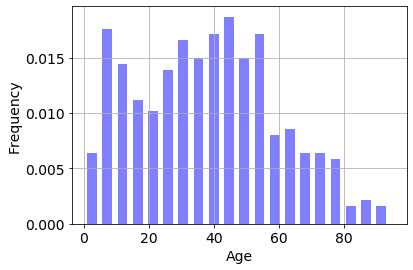

In [15]:
# Set up a distribution with mode = 7, limits 0 to 20 years.
young = np.random.triangular(0, 7, 20, n)
#plt.hist(young, bins=20, density=True, alpha=0.3, FaceColor='g')

# Set up a distribution with mode = 37, limits 0 to 100 years.
# Take five times as many samples from this distribution to reflect
# the range being five times larger than the young distribution. 
old = np.random.triangular(0, 37, 100, 5 * n)
#plt.hist(old, bins=20, density=True, alpha=0.3, FaceColor='r')

# Join them.
a = np.concatenate((young, old), axis=None)
#np.size(a)

# Now pick n at random from the resulting list
age = np.random.choice(a, n, replace=False)

# Convert to integers for age
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html
yrs = age.astype(int)

# Plot histogam.
plt.hist(age, bins=20, width=3, density=True, alpha=0.5, FaceColor='b' )
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
#yrs

In [16]:
# Do this in a few lines with:
r = np.concatenate((np.random.triangular(0, 7, 20, n), np.random.triangular(0, 37, 100, 5 * n)), axis=None)
age = np.random.choice(r, n, replace=False)
#plt.hist(age, bins=20, width=3.2, density=True, alpha=0.4)

I played around with various parameters until I found the ones which best reproduce the population pyramid above. It always works better with lots of samples. The main features I want to replicate are the two bulges at about 7 and 37 years.

## 4.4 Environmental factors

Lots of articles on myopia say that time spent outdoors (especially during childhood) is thought to have a protective effect against myopia [32-34]. If someone increases the amount of time they spend outside, they must be reducing the time they spend inside doing close work like reading, or looking at phone and computer screens. When outside we tend to be looking at objects in the distance so our eyes are not working hard to bring close objects into focus. Imagine children in a playground or playing catch in the school yard, and adults out walking the dog or playing five-a-side football. Apart from any association with myopia, being outside is good for general well-being [35], but children nowadays spend much less time outside than previous generations did [36, 37].

I will model environmental factors as a numerical variable, with one decimal place, representing hours spent outside per day. It will have a minimum value of zero. I will attempt to estimate in a very general way how much time people spend outside at different stages of their life. So this variable will depend on the age variable above. I found some sites that reported time spent each day on leisure activities, not necessarily all outside ones, on which I will base my code [38, 39]. I used the interactive tool in one link to roughly estimate this parameter in broad age groups; the peak is around 4 hours per day outside [40]. Babies don't spend too much time outside, but this increases when they become toddlers and start playschool perhaps. Primary school children probably spend a reasonable amount of time outside at school break times, for example, and playing sports or on the street with their friends. It might increase again for teenagers who have longer school days but more independence. As people progress through college and into working life, they must make more of an effort to get outside, and outside time becomes the time spent doing leisure or sports activities. When I count up the hours I spend outside each week, it's actually surprisingly low, especially in winter. I want to find a relatively simple relationship between age in years and time outside per day in hours.

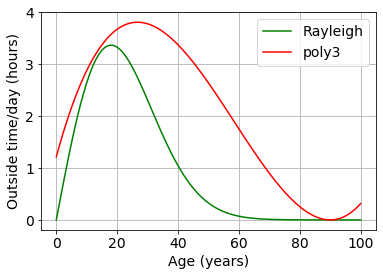

In [17]:
# Expect hours outside to vary with age, looks like the pdf for a Rayleigh but falls to zero too early. 
x = np.arange(0, 101)

# mean, scale
m, s = 18, 5
ray_pdf = lambda s, x: 100  * (x / s ** 2) * ( np.exp( (-x **2) / (2 * s **2) )  )
plt.plot(x, ray_pdf(m, x), 'g-', label='Rayleigh')

# Try a third order polynomial with roots close to the edges of my population data.
# Here I am creating a relationship that np.polyfit might be able to find later on.
# Roots at -10, +80 and scale appropriately for max hr/day about 4.
p3 = 0.00003 * ((x + 5) * (x - 90) * (x - 90))

# Tried lower order polynomials but they don't work well for this model.
#p2 = 0.00003 * (- 150 * (x ** 2) + 4800 * x + 64000)
#p1 = 0.00003 * (4800 * x + 64000)

plt.plot(x, p3, 'r-', label='poly3')
#plt.plot(x, p2, 'b-', label='p2')
#plt.plot(x, p1, 'c-', label='p1')

plt.legend()
plt.xlabel("Age (years)")
plt.ylabel("Outside time/day (hours)")
plt.grid()


I think this does a good job of modeling outside time up until about age 90. This weakness in the model is offset a little by the fact that ages over 90 only form a small part of the population as measured in the 2016 census, so I don't expect it to affect the final data set too much.

***
# 5. Generate the data set

## Genes (none, some, strong)

In [18]:
genetic_predisp = ['none', 'some', 'strong']
genes = np.random.choice(genetic_predisp, n, p=[0.6, 0.30, 0.10])
df = pd.DataFrame(genes, columns = ['Genes'])

## Years (Integer 0 - 100)

In [19]:
young = np.random.triangular(0, 7, 20, n)
old = np.random.triangular(0, 37, 100, 5 * n)
a = np.concatenate((young, old), axis=None)
age = np.random.choice(a, n, replace=False)
years = age.astype(int)
df['Age'] = years

## Hours outside per day (Positive number, two decimal places)

In [20]:
# Cycle through Age column, calculating hrs/day for each Age based on 3rd order polynomial.
# Add some normally-distributed noise.
h = 0.00003 * ((df['Age'] + 5) * (df['Age'] - 90) * (df['Age'] - 90)) + np.random.normal(0, 0.5, n)
print(type(h))
#print(h)

# Set any negaitve hours to zero
hr = [None]*n
for i, h in enumerate(h):
    if h < 0:
        hr[i] = 0
    else:
        hr[i] = h

# Round to two decimal places.
df['Hours'] = round(pd.Series(hr),2)
#df['Hours']

<class 'pandas.core.series.Series'>


## Refraction (Negative number, two decimal places)

Need to adjust m,s so that final result makes sense - come back to this. These are values used above. BUT hrs makes them even bigger.
- m0, s0 =  0, 0.5 # if Genes = none
- m1, s1 = -3.2, 2.4 # if Genes = some
- m2, s2 = -5, 2.4 # if Genes = strong

In [21]:
# Cycle through Genes column generating a single refraction from a distribution which depends on Genes.
# Reduce mean for Genes = some, strong by 1D as values will get boosted by environmental factors afterwards.

m0, s0 =  0, 0.5 # if Genes = none
m1, s1 = -2.2, 2.4 # if Genes = some
m2, s2 = -3.2, 2.4 # if Genes = strong: Genes increase liliehood of being myopic by how much? Saw et al 0.39, 0.74D avg

# Make empty list to hold refractive error.
err = [None]*n

# Fill the list depending on value of genes.
# Each number from normal dist is in a list - don't want that so use [0] to access the number, not the list.
# https://stackoverflow.com/questions/30311172/convert-list-or-numpy-array-of-single-element-to-float-in-python

for i, g in enumerate(genes):
    if g == 'some':
        q = np.random.normal(m1, s1, 1)
        err[i] = q[0]
        #err[i] = round(q[0], 2)
        #print("i {}: {}, {}".format(i, g, q))
    elif g == 'strong':
        q = np.random.normal(m2, s2, 1)
        err[i] = q[0]
        #err[i] = round(q[0],2)
        #print("i {}: {}, {}".format(i, g, q))
    else:
        #q = np.random.uniform(m0, s0, 1) + np.random.normal(m0, 0.1, 1)
        q = np.random.normal(m0, s0, 1)
        err[i] = q[0]
        #err[i] = round(q[0],2)
        #print("i {}: {}, {}".format(i, g, q))       
#print(err)

We will set any values of refraction > 0 to be = 0.

In [22]:
# Want to set = 0 any positive values in err list.
# https://stackoverflow.com/questions/9470056/learning-python-changing-value-in-list-based-on-condition

err = list(map(lambda x: 0 if x > 0 else x, err))
#print(err)

Finally, increase refraction by an amount which depends (inversely) on hours outside per day.

In [33]:
# Maybe adjust each resulting ref error by value in Hours (which depends on Age)?
# Want it to increase with decreasing hours outside.
# Straight line, positive slope, intercept at some high myopia
# Expect slope to be small as relationship is weak.

# Normalize to maximum of hrs outside/day
maxhr = round(max(hr),2)
print("Max hrs outside/day is ", maxhr)

#https://stackoverflow.com/questions/10271484/how-to-perform-element-wise-multiplication-of-two-lists/10271504#10271504
#[a*b for a,b in zip(lista,listb)]

# if b = maxhr, a unchanged, else a made more negative
err2 = [a * (2 - (b / maxhr)) for a,b in zip(err, hr)] # Beware of divide by zero if do / rather than *.
#print(type(err2))

# Round to two decimal places before inserting into data frame.
df['Refraction'] = round(pd.Series(err2),2)

# Checking
#plt.plot(df['Hours'], df['Refraction'], 'g.')
#df[['Genes','Hours','Refraction']]

Max hrs outside/day is  4.87


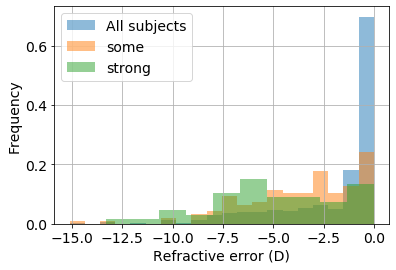

In [24]:
# Double check that populations Genes = (strong, some) are different.
plt.hist(df['Refraction'], bins=20, density=True, alpha=0.5, label='All subjects')
plt.hist(df[df['Genes']=='some']['Refraction'], bins=20, density=True, alpha=0.5, label='some')
plt.hist(df[df['Genes']=='strong']['Refraction'], bins=10, density=True, alpha=0.5, label='strong')

plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

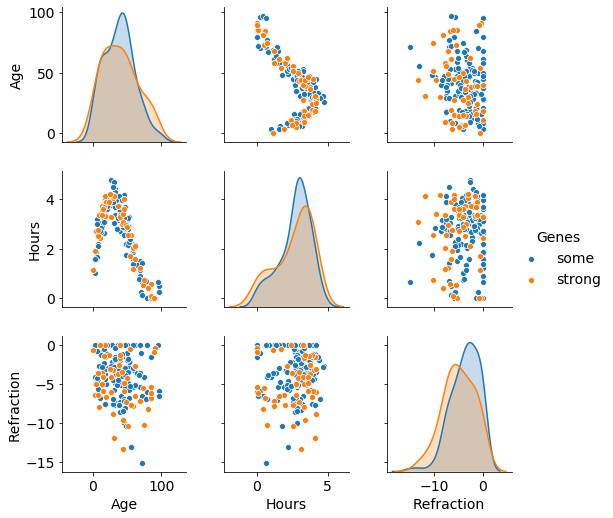

In [30]:
sns.pairplot(df, hue='Genes', hue_order=['none', 'some', 'strong'])

# Look at a subset of genetic predispositions.
# sns.pairplot(df, hue='Genes', hue_order=['some', 'strong'])

Summarize variables and data types:
- Genes
- Age
- Environmental factors
- Refraction

If I were presented with this data set, what would I think?

***
# References
*Note: As references were hyper-linked a few weeks into the project, approximate dates of first access are given if exact date unknown.*

### Software and packages used to complete this project

1. [Anaconda Distribution for Python](https://www.anaconda.com/) (Accessed Nov. 2019)
- [Python Software Foundation](https://www.python.org/) (Accessed Nov. 2019)
- [Project Jupyter](https://jupyter.org/) (Accessed Nov. 2019)
- [nbviewer: Sharing Jupyter notebooks](https://nbviewer.jupyter.org/) (Accessed Nov. 2019)
- [matplotlib: Python plotting library](https://matplotlib.org/) (Accessed Nov. 2019)
- [NumPy](https://numpy.org/) (Accessed Nov. 2019)
- [GitHub](https://github.com/) (Accessed Nov. 2019)
- Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython Wes McKinney. ISBN-13: 978-1491957660 ISBN-10:1491957662
- [Random sampling (numpy.random)](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html)(Accessed Nov. 2019)
- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) (Accessed Nov. 2019)

### Myopia

11. [WIKIPEDIA: Near-sightedness](https://en.wikipedia.org/wiki/Near-sightedness) (Accessed Nov. 2019)

- [All about vision: What is myopia?](https://www.allaboutvision.com/conditions/myopia-faq/what-is-myopia.htm) (Accessed Nov. 2019)

- [VISION EXCELLENCE: Myopia (short-sightedness)](https://www.visionexcellence.com.au/common-eye-conditions/myopia-short-sightedness/) (Accessed Nov. 2019)

- [IMI – Defining and Classifying Myopia: A Proposed Set of Standards for Clinical and Epidemiologic Studies](https://iovs.arvojournals.org/article.aspx?articleid=2727312) (Accessed Nov. 2019)

- [American Academy of Ophthalmology: Global Prevalence of Myopia and High Myopia and Temporal Trends from 2000 through 2050](https://www.aaojournal.org/article/S0161-6420(16)00025-7/abstract) (Accessed Nov. 2019)

- [Cooper Vision: MiSight 1 day lenses](https://coopervision.co.uk/contact-lenses/misight-1-day) (Accessed Nov. 2019)

- [All about vision: Why myopia progression is a concern.](https://www.allaboutvision.com/parents/myopia-progression.htm) (Accessed Nov. 2019)

- [Health Service Executive: Myopia](https://www.hse.ie/eng/health/az/m/myopia/treating-short-sightedness.html) (Accessed Nov. 2019)

### Education
19. [Education linked to higher risk of short-sightedness](https://www.bmj.com/company/newsroom/education-linked-to-higher-risk-of-short-sightedness/) (Accessed 8 Dec. 2019)

### Socio-economic status

20. [Measuring Socioeconomic Status and Subjective Social Status](https://www.apa.org/pi/ses/resources/class/measuring-status) (Accessed Dec. 2019)

- [BBC: What is your 21st Century social class?](https://www.bbc.com/news/magazine-34766169) (Accessed Dec. 2019)

### Myopia and genetics

22. [Insight into the molecular genetics of myopia](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5757860/) (Accessed Nov. 2019) *Technical*

- [Stanford at The Tech: Understanding Genetics](https://genetics.thetech.org/ask/ask73) (Accessed Nov. 2019)

- [Science Daily: New genetic risk factors for myopia discovered](https://www.sciencedaily.com/releases/2016/04/160421133905.htm) (Accessed Nov. 2019)

- [All About Vision: Is being nearsighted genetic?](https://www.allaboutvision.com/conditions/myopia-faq/is-being-nearsighted-genetic.htm) (Accessed Nov. 2019)

- [Component dependent risk factors for ocular parameters in Singapore Chinese children](https://www.aaojournal.org/article/S0161-6420(02)01220-4/fulltext) (Accessed 10 Dec. 2019)

### Refraction

27. [Characteristics of Refractive Errors in a Population of Adults in the Central Region of Poland](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5800189/) (Accessed Nov. 2019)

- [stackoverflow: How to specify upper and lower limits when using numpy.random.normal](https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal) (Accessed Nov. 2019)

- [Study shows myopia prevalence in children in the UK has more than doubled in the last 50 years](https://www.college-optometrists.org/the-college/media-hub/news-listing/nicer-myopia-children.html) (Accessed 10 Dec. 2019) *children with one parent with myopia are at least three times more likely to be myopic than those without a myopic parent. This increases to over seven times more likely when both parents are myopes*

- [Moorfields Eye Hospital NHS Foundation Trust: Myopia (short sight)](https://www.moorfields.nhs.uk/condition/myopia-short-sight) (Accessed Dec. 2019) *About three in 10 people in the UK are short-sighted and about 5% of those have severe myopia*

### Age

31. [WIKIPEDIA: Population pyramid](https://en.wikipedia.org/wiki/Population_pyramid) (Accessed Nov. 2019)

- [StackExchange: If my histogram shows a bell-shaped curve, can I say my data is normally distributed?](https://stats.stackexchange.com/questions/129417/if-my-histogram-shows-a-bell-shaped-curve-can-i-say-my-data-is-normally-distrib) (Accessed Nov. 2019)

- [Central Statistics Office:  E3001: Enumerated Population 1926 to 2016 by Age Group, Sex and CensusYear](https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=E3001&PLanguage=0) (Accessed Nov. 2019)

### Environmental factors as related to myopia

34. [Healio Primary Care Optometry News: Time outdoors reduces myopia risk in subset of children](https://www.healio.com/optometry/pediatrics/news/online/%7B7aa57b69-30ea-44fb-9f44-5159e62a6f79%7D/time-outdoors-reduces-myopia-risk-in-subset-of-children) Accessed Nov. 2019

- [Time spent in outdoor activities in relation to myopia prevention and control: a meta‐analysis and systematic review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5599950/) Accessed Nov. 2019
"Saw et al. [9] showed that compared to children of nonmyopic parents, children of myopic parents have a higher degree of myopia (average, 0.39 D for those with one myopic parent and 0.74 D for those with two myopic parents)"

- [The association between time spent outdoors and myopia in children and adolescents: a systematic review and meta-analysis.](https://www.ncbi.nlm.nih.gov/pubmed/22809757) Accessed Nov. 2019

- [Scientists Determine the Exact Amount of Time We Should Be Spending Outside](https://www.inverse.com/article/56685-nature-outdoors-mental-health-link) Accessed Nov. 2019

- [Independent: CHILDREN SPEND TWICE AS LONG LOOKING AT SCREENS THAN PLAYING OUTSIDE, STUDY FINDS](https://www.independent.co.uk/life-style/children-screens-play-outside-computer-phone-time-healthy-games-a8603411.html) Accessed Nov. 2019

- [Child in the City: Children spend half the time playing outside in comparison to their parents](https://www.childinthecity.org/2018/01/15/children-spend-half-the-time-playing-outside-in-comparison-to-their-parents/?gdpr=accept) Accessed Nov. 2019

- [The National Human Activity Pattern Survey (NHAPS)](https://www.nature.com/articles/7500165.pdf?origin=ppub) Accessed Dec. 2019

- [US Bureau of Labor Statistics: Average hours per day spent in selected activities by age](https://www.bls.gov/charts/american-time-use/activity-by-age.htm) Accessed Dec. 2019

- [Flowing Data: How People Like You Spend Their Time (interactive tool based on above reference)](https://flowingdata.com/2016/12/06/how-people-like-you-spend-their-time/) Accessed Dec. 2019

### General
43. [PurpleBooth/README-Template.md](https://gist.github.com/PurpleBooth/109311bb0361f32d87a2) (Accessed 7 Dec. 2019)